In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Initialize Grid

In [34]:
def initialize_grid(grid_size, pv, agent_types):
    grid = np.zeros((grid_size, grid_size))
    num_vacant = int(grid_size**2 * pv)
    num_agents = grid_size**2 - num_vacant

    # Randomly place agents
    for _ in range(num_agents):
        agent = random.choice(agent_types)
        x, y = np.random.randint(0, grid_size, 2)
        while grid[x, y] != 0:
            x, y = np.random.randint(0, grid_size, 2)
        grid[x, y] = agent
    return grid

Check Satisfaction

In [35]:
def is_satisfied(x, y, grid, tolerance):
    agent = grid[x, y]
    if agent == 0:
        return True

    # Count similar and different neighbors
    neighbors = grid[max(x-1, 0):min(x+2, grid_size), max(y-1, 0):min(y+2, grid_size)].flatten()
    num_similar = np.sum(neighbors == agent)
    num_different = np.sum(neighbors == -agent)

    if num_similar + num_different == 0:
        return True  # No neighbors
    return num_similar / (num_similar + num_different) >= tolerance


Apply Aging and Move Agents

In [36]:
def apply_aging(age, grid, max_age):
    age[grid != 0] += 1
    age = np.clip(age, 0, max_age)
    return age

def move_agents(grid, age, grid_size, tolerance, max_age):
    new_grid = grid.copy()
    new_age = age.copy()

    # List of vacant spaces
    vacant_spaces = [(i, j) for i in range(grid_size) for j in range(grid_size) if grid[i, j] == 0]

    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] != 0 and not is_satisfied(x, y, grid, tolerance):
                move_prob = 1 - age[x, y] / max_age
                if random.random() < move_prob and vacant_spaces:
                    new_x, new_y = random.choice(vacant_spaces)
                    new_grid[new_x, new_y], new_grid[x, y] = grid[x, y], 0
                    new_age[new_x, new_y] = 0
                    vacant_spaces.remove((new_x, new_y))
                    vacant_spaces.append((x, y))
                else:
                    new_age[x, y] = min(age[x, y] + 1, max_age)
    return new_grid, new_age


Run

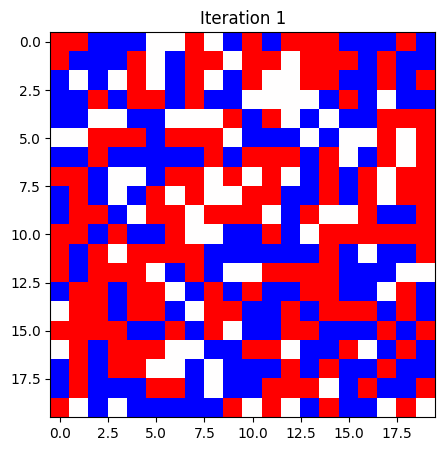

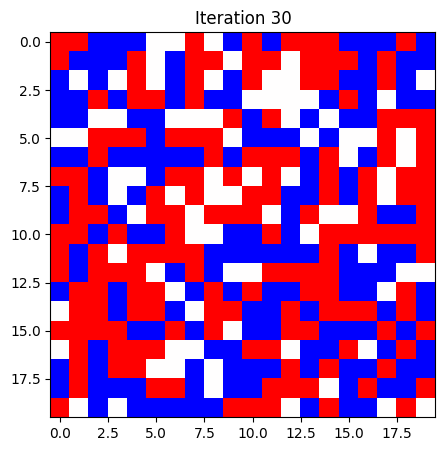

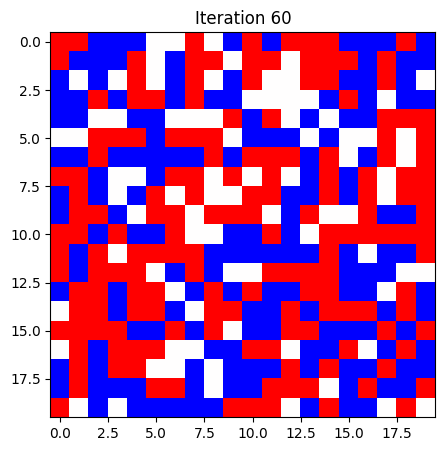

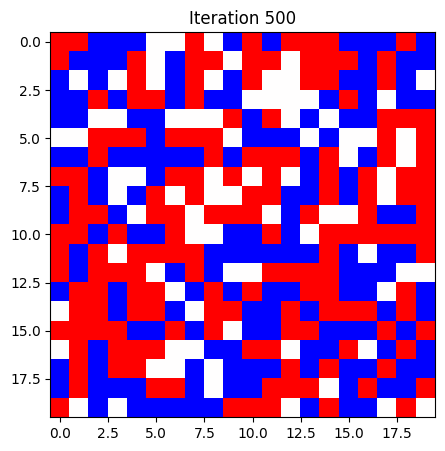

In [40]:
# Parameters
grid_size = 20
pv = 0.2
tolerance = 0.2
max_age = 5
iterations = 500
agent_types = [1, -1]

# Initialize grid and age matrix
grid = initialize_grid(grid_size, pv, agent_types)
age = np.zeros_like(grid)

# Simulation loop
for it in range(iterations):
    grid, age = move_agents(grid, age, grid_size, tolerance, max_age)
    age = apply_aging(age, grid, max_age)

    # Visualization at specific iterations
    if it in [0, 29, 59, iterations - 1]:
        plt.figure(figsize=(5, 5))
        plt.imshow(grid, cmap="bwr")
        plt.title(f"Iteration {it + 1}")
        plt.show()
